Data from https://www.kaggle.com/meganrisdal/la-county-restaurant-inspections-and-violations/data

This dataset contains Environmental Health Inspection Results for Restaurants and Markets in Los Angeles County. 
Restaurants and markets in Los Angeles county are regularly inspected for health code violations. 
The data covers health code inspections (inspections.csv) and health code violations (violation.csv). 

In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
inspections = pd.read_csv('~/Development/Thinkful/Unit-1/Unit1_Capstone/la-county-restaurant-inspections-and-violations/inspections.csv')

violations = pd.read_csv('~/Development/Thinkful/Unit-1/Unit1_Capstone/la-county-restaurant-inspections-and-violations/violations.csv')

## Inspections

In [3]:
inspections.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [4]:
inspections.describe()

,program_element_pe,score,service_code
count,191371.000000,191371.000000,191371.000000
mean,1629.888980,93.753306,7.078246
std,9.391426,3.845518,48.932257
min,1610.000000,54.000000,1.000000
25%,1631.000000,91.000000,1.000000
50%,1632.000000,94.000000,1.000000
75%,1635.000000,97.000000,1.000000
max,1641.000000,100.000000,401.000000


### Date of Inspection

In [29]:
#create method to create new variables of date elements
def ExtractDate(val, n):
    tokens = val.split('-')
    return tokens[n]

#apply date extraction method to activity date to create year, month and day variables
inspections['year'] = inspections['activity_date'].apply(ExtractDate, args=(0,))
inspections['month'] = inspections['activity_date'].apply(ExtractDate, args=(1,))
inspections['day'] = inspections['activity_date'].apply(ExtractDate, args=(2,))

inspections['year'] = pd.to_numeric(inspections['year'], errors='coerce', downcast='integer')
inspections['month'] = pd.to_numeric(inspections['month'], errors='coerce', downcast='integer')
inspections['day'] = pd.to_numeric(inspections['day'], errors='coerce', downcast='integer')

In [30]:
inspections.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,program_status,record_id,score,serial_number,service_code,service_description,business,year,month,day
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,retail,2017,5,9
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,restaurant,2017,4,10
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,...,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION,retail,2017,4,4
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,...,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION,restaurant,2017,8,15
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,...,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION,restaurant,2016,9,26


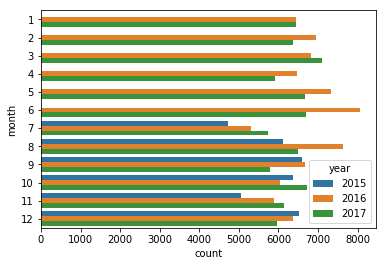

In [35]:
sns.countplot(y="month", hue="year", data=inspections)

Data for all months in 2015 is not available, so we'll focus on 2016 and 2017.

In [37]:
recentInspections = inspections.loc[inspections.year > 2015]

### Scores by Business Type

In [39]:
#aggregate descriptions to new business column
inspections['business'] = 'other'
inspections.loc[inspections['pe_description'].str.contains("RESTAURANT", na=False), 'business'] = 'restaurant'
inspections.loc[inspections['pe_description'].str.contains("RETAIL", na=False), 'business'] = 'retail'

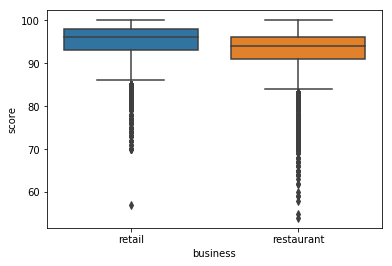

In [40]:
sns.boxplot(x="business", y="score", data=inspections);

Both business types most frequently score 'A' grades.  Retail business tend to score better than restaurants, so let's look at restaurants.

In [41]:
restaurants = recentInspections.loc[recentInspections.business == 'restaurant']

### Types of Inspection

In [43]:
inspections.groupby('service_description').describe()

day                                 \
                                     count       mean       std  min  25%   
service_description                                                         
OWNER INITIATED ROUTINE INSPECT.    2908.0  15.770633  8.755833  1.0  8.0   
ROUTINE INSPECTION                188463.0  15.667892  8.637164  1.0  8.0   

                                                       month            \
                                   50%   75%   max     count      mean   
service_description                                                      
OWNER INITIATED ROUTINE INSPECT.  16.0  23.0  31.0    2908.0  7.267538   
ROUTINE INSPECTION                16.0  23.0  31.0  188463.0  6.989515   

                                   ...   service_code             year  \
                                   ...            75%    max     count   
service_description                ...                                   
OWNER INITIATED ROUTINE INSPECT.   ...          401.0  401.0    2908.0   
ROUTINE INSPECTION                 ...            1.0    1.0  188463.0   

                                                                         \
                                         mean       std     min     25%   
service_description                                                       
OWNER INITIATED ROUTINE INSPECT.  2016.246217  0.782442  2015.0  2016.0   
ROUTINE INSPECTION                2016.211819  0.731948  2015.0  2016.0   

                                                          
                                     50%     75%     max  
service_description                                       
OWNER INITIATED ROUTINE INSPECT.  2016.0  2017.0  2017.0  
ROUTINE INSPECTION                2016.0  2017.0  2017.0  

[2 rows x 48 columns]

All inspections are considered routine, less than 2% are owner initiated.

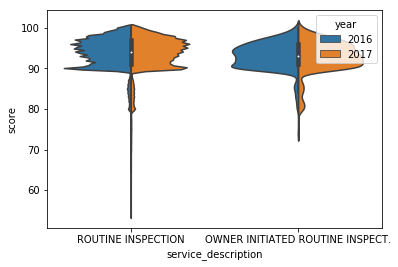

In [47]:
sns.violinplot(x="service_description", y="score", hue="year", data=recentInspections, split=True);

Here we see a visually similar spread of scores in the two years (2016 and 2017) and somewhat similar scores across the two inspection types (Regular and Owner-Initiated), with most scores will falling within an 'A' grade.  But the Regular inspections show non-passes grades (less thatn 70), while the Owner Initiated inspections includes failures.  A t-test will better compare these two samples:

In [51]:
#set sample of Routine Inspections
inspectionsReg = inspections.loc[inspections.service_description ==  'ROUTINE INSPECTION']

#set sample of Owner-Initiated Inspections
inspectionsOwn = inspections.loc[inspections.service_description ==  'OWNER INITIATED ROUTINE INSPECT.']

In [52]:
print(ttest_ind(inspectionsReg['score'], inspectionsOwn['score'], equal_var=False))

Ttest_indResult(statistic=11.705261793928036, pvalue=5.558176572318883e-31)


The t-test shows a statisitically significant difference in the scores of the Regular Inspections and Owner Initiated Inspections.  This difference, and the absence of failing scores on Owner-Initated Inspections, might indicate that Owners request inspections because the anticipated score is higher than a previous Regular Inspection.

### Restaurant Scores less than 'A'

In [8]:
badInspections = restaurants.loc[restaurants['score'] < 90]

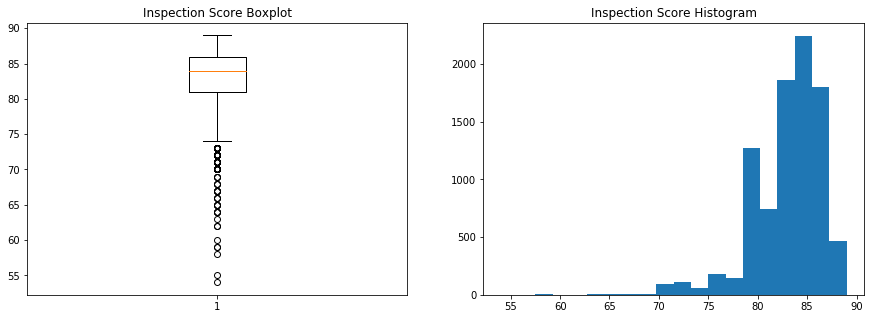

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(badInspections['score'].dropna(how = 'any'))
plt.title('Inspection Score Boxplot')

plt.subplot(1, 2, 2)
plt.hist(badInspections['score'].dropna(how = 'any'), bins=20)
plt.title('Inspection Score Histogram')

plt.show()

Scores under an 'A' mostly pass, failing grades are outliers.  Let's focus on those passing grades that are below an 'A'

### Passing inspection score below A

In [10]:
bcInspections = badInspections.loc[badInspections['score'] > 70]

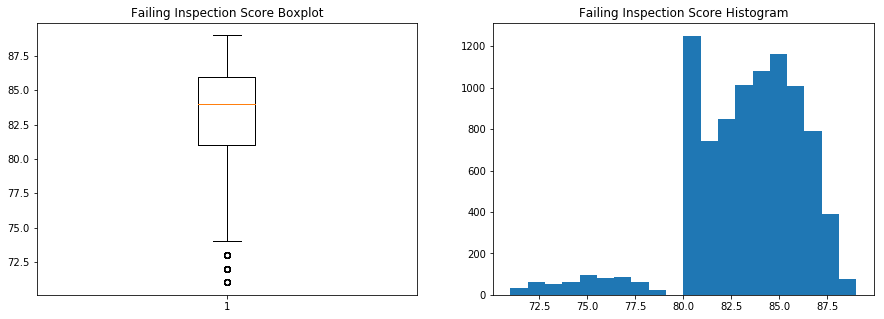

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(bcInspections['score'].dropna(how = 'any'))
plt.title('Failing Inspection Score Boxplot')

plt.subplot(1, 2, 2)
plt.hist(bcInspections['score'].dropna(how = 'any'), bins=20)
plt.title('Failing Inspection Score Histogram')

plt.show()

### Location

In [12]:
bcInspections.groupby('facility_zip').describe()

program_element_pe                                          \
                          count         mean       std     min      25%   
facility_zip                                                              
90001                      34.0  1632.588235  2.284568  1631.0  1632.00   
90001-3317                  1.0  1632.000000       NaN  1632.0  1632.00   
90002                       3.0  1631.333333  0.577350  1631.0  1631.00   
90003                      48.0  1632.500000  1.675861  1631.0  1632.00   
90003-1131                  2.0  1632.000000  0.000000  1632.0  1632.00   
90003-1284                  1.0  1632.000000       NaN  1632.0  1632.00   
90003-1636                  1.0  1632.000000       NaN  1632.0  1632.00   
90003-1841                  1.0  1632.000000       NaN  1632.0  1632.00   
90003-1844                  3.0  1632.000000  0.000000  1632.0  1632.00   
90003-3123                  1.0  1632.000000       NaN  1632.0  1632.00   
90003-4416                  1.0  1632.000000       NaN  1632.0  1632.00   
90003-4934                  2.0  1631.000000  0.000000  1631.0  1631.00   
90004                      72.0  1634.750000  3.084491  1630.0  1632.00   
90004-2604                  2.0  1638.000000  0.000000  1638.0  1638.00   
90004-3333                  2.0  1635.000000  0.000000  1635.0  1635.00   
90004-4418                  2.0  1638.000000  0.000000  1638.0  1638.00   
90004-4430                  2.0  1638.000000  0.000000  1638.0  1638.00   
90004-4811                  2.0  1632.000000  0.000000  1632.0  1632.00   
90004-5905                  1.0  1631.000000       NaN  1631.0  1631.00   
90005                     192.0  1634.510417  3.117237  1630.0  1632.00   
90005-1341                  2.0  1638.000000  0.000000  1638.0  1638.00   
90005-1349                  1.0  1631.000000       NaN  1631.0  1631.00   
90005-1902                  1.0  1635.000000       NaN  1635.0  1635.00   
90005-2123                  1.0  1632.000000       NaN  1632.0  1632.00   
90005-2518                  1.0  1638.000000       NaN  1638.0  1638.00   
90005-3113                  2.0  1631.000000  0.000000  1631.0  1631.00   
90006                     144.0  1634.736111  3.255949  1631.0  1632.00   
90006-2314                  1.0  1638.000000       NaN  1638.0  1638.00   
90006-3306                  1.0  1632.000000       NaN  1632.0  1632.00   
90007                      21.0  1632.714286  2.369448  1631.0  1631.00   
...                         ...          ...       ...     ...      ...   
91801-3542                  1.0  1630.000000       NaN  1630.0  1630.00   
91801-3830                  1.0  1638.000000       NaN  1638.0  1638.00   
91801-4049                  1.0  1635.000000       NaN  1635.0  1635.00   
91801-5013                  3.0  1641.000000  0.000000  1641.0  1641.00   
91801-5053                  4.0  1638.000000  0.000000  1638.0  1638.00   
91801-5073                  2.0  1638.000000  0.000000  1638.0  1638.00   
91801-5235                  1.0  1635.000000       NaN  1635.0  1635.00   
91801-5238                  5.0  1636.200000  1.643168  1635.0  1635.00   
91801-7473                  1.0  1632.000000       NaN  1632.0  1632.00   
91803                      54.0  1635.833333  3.124764  1631.0  1635.00   
91803-1340                  1.0  1631.000000       NaN  1631.0  1631.00   
91803-3229                  2.0  1635.000000  0.000000  1635.0  1635.00   
91803-3233                  4.0  1635.000000  0.000000  1635.0  1635.00   
91803-4315                  3.0  1632.000000  0.000000  1632.0  1632.00   
93243                       2.0  1636.500000  2.121320  1635.0  1635.75   
93243-9701                  1.0  1638.000000       NaN  1638.0  1638.00   
93510                       2.0  1633.000000  1.414214  1632.0  1632.50   
93532                       1.0  1638.000000       NaN  1638.0  1638.00   
93534                      97.0  1635.113402  2.827971  1630.0  1632.00   
93534-3641                  3.0  1635.

In [13]:
def ExtractZip(val):
    return val[:5]

bcInspections['zip'] = bcInspections['facility_zip'].apply(ExtractZip)
pd.to_numeric(bcInspections['zip'], errors='coerce')

bcInspections[['zip', 'score']].groupby('zip').describe()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


score                                                     
       count       mean       std   min    25%   50%    75%   max
zip                                                              
90001   35.0  83.971429  3.364920  73.0  82.00  84.0  87.00  89.0
90002    3.0  80.000000  7.549834  72.0  76.50  81.0  84.00  87.0
90003   60.0  83.066667  3.750104  72.0  81.00  83.0  85.25  89.0
90004   83.0  82.783133  2.571173  73.0  81.00  83.0  85.00  88.0
90005  200.0  82.610000  3.406748  71.0  80.75  83.0  85.00  89.0
90006  146.0  83.047945  3.232021  72.0  81.00  84.0  85.00  89.0
90007   21.0  83.142857  3.705209  72.0  81.00  84.0  85.00  89.0
90008   18.0  83.000000  4.485270  72.0  81.25  83.0  86.00  88.0
90010   84.0  82.523810  3.413214  71.0  80.00  83.0  85.00  89.0
90011   42.0  84.000000  3.305575  72.0  83.00  84.0  86.00  89.0
90012  156.0  83.782051  2.598498  76.0  82.00  84.0  86.00  89.0
90013   12.0  83.833333  2.622744  80.0  82.00  83.5  86.25  88.0
90014   24.0  83.333333  3.198732  75.0  81.00  84.0  86.00  87.0
90015  109.0  83.201835  3.293596  72.0  81.00  84.0  86.00  88.0
90016   37.0  83.270270  3.798016  71.0  81.00  84.0  86.00  89.0
90017   50.0  83.360000  3.640812  71.0  82.00  84.0  86.00  88.0
90018   31.0  83.741935  2.874807  76.0  81.00  84.0  86.00  89.0
90019   89.0  82.696629  3.335091  72.0  80.00  83.0  85.00  88.0
90020  213.0  82.107981  3.391524  71.0  80.00  83.0  84.00  88.0
90021   17.0  83.882353  3.218741  76.0  83.00  84.0  86.00  89.0
90022  100.0  83.520000  3.270560  73.0  82.00  84.0  86.00  89.0
90023   26.0  84.615385  2.401282  78.0  84.00  84.5  86.00  89.0
90024   89.0  83.224719  3.326043  72.0  81.00  83.0  85.00  89.0
90025   86.0  82.860465  3.409891  72.0  81.00  83.0  85.00  89.0
90026   59.0  83.711864  2.846964  77.0  81.00  84.0  86.00  88.0
90027   49.0  83.571429  2.121320  80.0  82.00  83.0  85.00  88.0
90028  101.0  83.564356  2.950986  72.0  82.00  84.0  86.00  88.0
90029   75.0  83.480000  3.037424  73.0  82.00  84.0  86.00  88.0
90030    1.0  85.000000       NaN  85.0  85.00  85.0  85.00  85.0
90031   19.0  82.631579  4.016778  72.0  82.00  84.0  85.50  87.0
...      ...        ...       ...   ...    ...   ...    ...   ...
91754  284.0  82.169014  3.278524  71.0  80.00  82.0  85.00  88.0
91755   44.0  81.181818  3.074824  72.0  80.00  81.0  83.00  86.0
91756    1.0  84.000000       NaN  84.0  84.00  84.0  84.00  84.0
91765   45.0  83.755556  3.587577  72.0  83.00  84.0  86.00  88.0
91766   46.0  84.434783  2.418927  80.0  83.00  84.5  86.00  88.0
91767   44.0  83.318182  3.167955  74.0  81.00  84.0  86.00  88.0
91768   32.0  84.718750  2.439386  80.0  83.00  85.0  87.00  88.0
91770   42.0  82.571429  2.768665  75.0  80.00  83.0  85.00  88.0
91773   13.0  82.923077  2.177978  80.0  81.00  83.0  84.00  86.0
91775    2.0  77.500000  4.949747  74.0  75.75  77.5  79.25  81.0
91776   53.0  83.207547  2.567238  75.0  81.00  83.0  85.00  88.0
91780    7.0  82.142857  3.532165  76.0  81.00  82.0  84.00  87.0
91783    1.0  86.000000       NaN  86.0  86.00  86.0  86.00  86.0
91789   71.0  83.577465  3.115225  71.0  82.00  84.0  86.00  88.0
91790   46.0  83.108696  3.149803  72.0  81.00  84.0  85.00  88.0
91791   15.0  83.933333  3.058166  80.0  82.00  83.0  87.00  89.0
91792   39.0  83.564103  3.093243  72.0  82.50  84.0  86.00  87.0
91801  141.0  82.361702  3.085164  71.0  80.00  82.0  85.00  89.0
91803   64.0  82.140625  3.236043  72.0  80.00  82.0  84.00  88.0
93243    3.0  81.000000  7.211103  73.0  78.00  83.0  85.00  87.0
93510    2.0  86.500000  0.707107  86.0  86.25  86.5  86.75  87.0
93532    1.0  82.000000       NaN  82.0  82.00  82.0  82.00  82.0
93534  101.0  82.287129  2.801202  72.0  81.00  82.0  84.00  88.0
93535   21.0  82.285714  3.211586  73.0  80.00  83.0  84.00  88.0
93536   29.0  82.586207  3.006151  74.0  80.00  83.0  85.00  89.0
93543    3.0  81.000000  3.000000  78.0  79.50  81.0  82.50  84.0
93550   39.0  82.641026  3.752102  76.0  80.00 

In [16]:
zipMeans = bcInspections.groupby('zip')[['score']].agg('mean')
zipMeans = zipMeans.sort_values(by=['score'])
zipMeans.head(10)

,score
zip,
91107,72.000000
90506,75.000000
91775,77.500000
90510,78.000000
90637,80.000000
90002,80.000000
91501,80.000000
90631,80.000000
90524,80.000000


The areas with the lowest average passing scores are in zip codes 91107, 90506, 91775 and 90510 with C grades, and zip codes 90637, 90002, 91501, 90631 and 90524 with very low B grades.

## Violations

In [17]:
violations.head()

,points,serial_number,violation_code,violation_description,violation_status
0,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
1,4,DAT2HKIRE,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE
2,1,DAT2HKIRE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
3,1,DAT2HKIRE,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
4,1,DAQN0I8EA,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


In [18]:
violations.shape

(906014, 5)

In [37]:
violationCounts = violations.violation_description.value_counts()

In [38]:
violationCounts.head(10)

# 44. Floors, walls and ceilings: properly built, maintained in good repair and clean    102012
# 33. Nonfood-contact surfaces clean and in good repair                                  100083
# 35. Equipment/Utensils - approved; installed; clean; good repair, capacity              80020
# 40. Plumbing: Plumbing in good repair, proper backflow devices                          50870
# 36. Equipment, utensils and linens: storage and use                                     49744
# 37. Adequate ventilation and lighting; designated areas, use                            48046
# 43. Premises; personal/cleaning items; vermin-proofing                                  42949
# 07. Proper hot and cold holding temperatures                                            41110
# 30. Food properly stored; food storage containers identified                            39855
# 39. Wiping cloths: properly used and stored                                             35849
Name: violation_description, dtype: int6

Most frequent violations are F044 and F033:
Floors, walls and ceilings: properly built, maintained in good repair and clean
Nonfood-contact surfaces clean and in good repair
Equipment/Utensils - approved; installed; clean; good repair, capacity

# Experimentation

Analysis that highlights your experimental hypothesis.
A rollout plan showing how you would implement and rollout the experiment
An evaluation plan showing what constitutes success in this experiment

## Hypothesis

Design informational materials about the most frequent violations with resources for corrective action.  
Provide these informational materials to restaurants in the areas with lower average inspection scores.
Anticipated outcome of improved scores in restaurants in serviced areas.

## Rollout Plan


### Before Rollout

Collect references for corrective action on frequent violations.
Create information materials/pamphlets defining violation, providing examples


### Initial Rollout

Distribute information on one frequent violation to restaurants in one zip code for one month.
Evaluate average inspection scores in the treated area after one month


### Success Metrics

Average Scores in treates area increase by 2 points


### Secondary Metrics

Frequency of treated violations decreases.
